In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
import os
os.chdir('C:/Users/adele/OneDrive/Documents/2024_WINTER/COSC3117/ass4 docs')

In [3]:
# Load the datasets
train_data = pd.read_csv('titanic_train.csv')
test_data = pd.read_csv('titanic_test.csv')

In [4]:
# Data preprocessing
# Handle missing values
train_data['age'].fillna(train_data['age'].median(), inplace=True)
train_data['embarked'].fillna(train_data['embarked'].mode()[0], inplace=True)
# Drop 'cabin' and 'ticket'
train_data.drop(['cabin', 'ticket'], axis=1, inplace=True)

In [5]:
# Convert 'sex' and 'embarked' to numeric types
label_encoder = LabelEncoder()
train_data['sex'] = label_encoder.fit_transform(train_data['sex'])
train_data['embarked'] = label_encoder.fit_transform(train_data['embarked'])

In [6]:
# Feature Selection
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
X = train_data[features]
y = train_data['survived']

In [7]:
# Splitting the dataset for training and validation
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Training the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
# Predicting and evaluating on the validation set
predictions = clf.predict(X_validate)
accuracy = accuracy_score(y_validate, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7206703910614525


In [16]:
# Load the datasets
train_data = pd.read_csv('titanic_train.csv')
test_data = pd.read_csv('titanic_test.csv')

In [24]:
# Define a function for preprocessing
def preprocess_data(data):
    # Fill missing 'Embarked' values with the mode
    data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)
    # Encode 'Sex' and 'Embarked'
    label_encoders = {}
    for column in ['sex', 'embarked']:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le
    # Select relevant features
    features = ['pclass', 'sex', 'embarked']
    X = data[features]
    return X, label_encoders

In [25]:
# Preprocess the training data
X_train, le_dict = preprocess_data(train_data)
y_train = train_data['survived']

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
# Preprocess the test data (apply the same transformations)
X_test, _ = preprocess_data(test_data)
y_test = test_data['survived']  # Assuming the 'Survived' column is present in test_data

In [28]:
# Making predictions on the test dataset
test_predictions = clf.predict(X_test)

# Calculating accuracy score
accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.7990430622009569


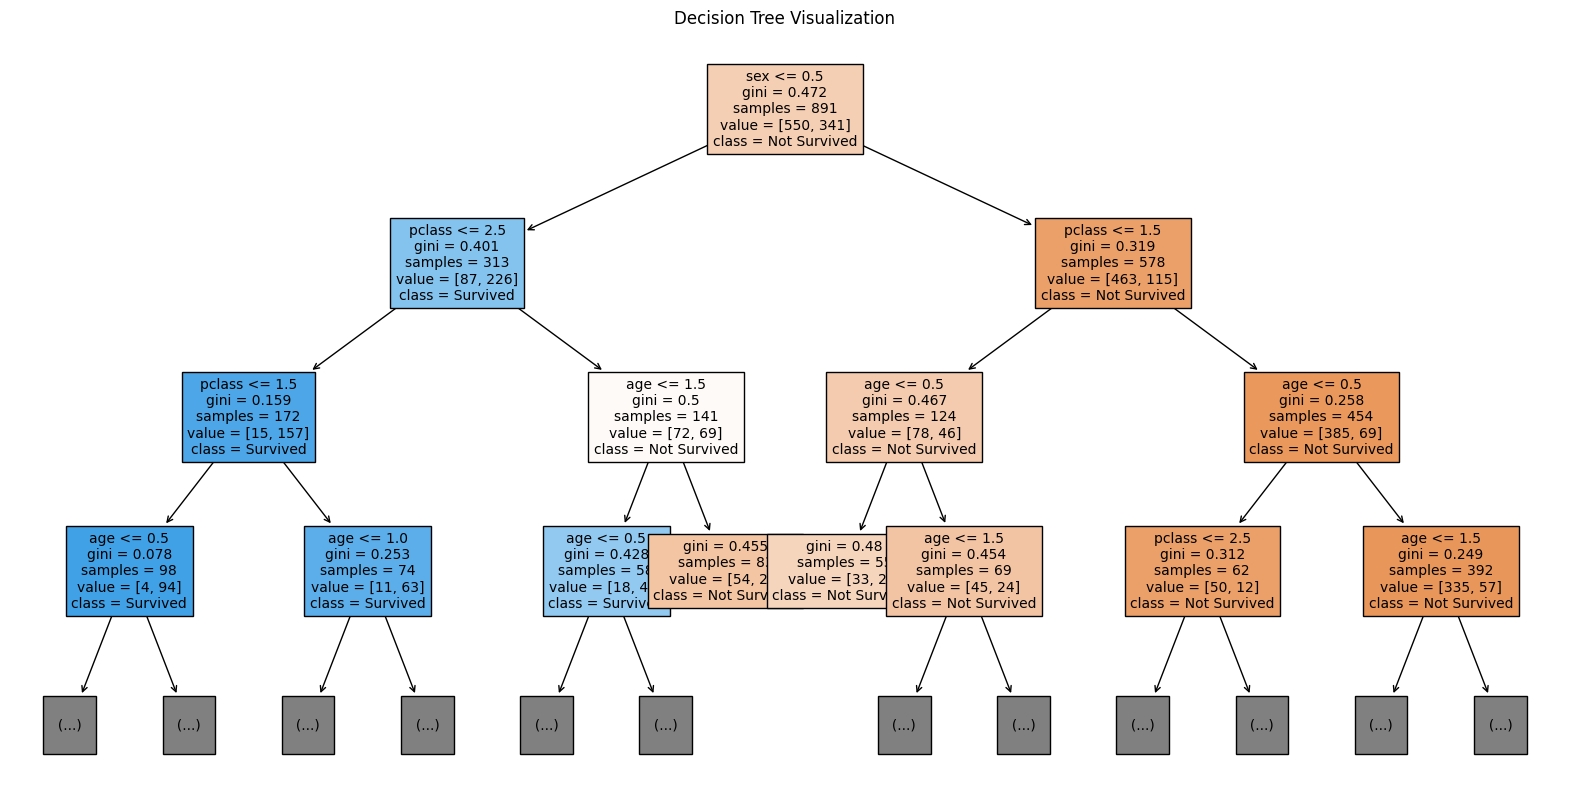

In [29]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=features, class_names=['Not Survived', 'Survived'], max_depth=3, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()